In [78]:
%reset -f

In [79]:
import os
import pandas as pd
from plotnine import *



In [80]:
base_path = os.path.join(os.getcwd(), "Modality Trends")

# Import DataFrames made in our KDD
df_days_total = pd.read_excel(os.path.join(base_path, "df_days_total.xlsx"))
"""days_scheduled_semester = pd.read_excel(os.path.join(base_path, "days_scheduled_semester.xlsx"))

days_by_component_total = pd.read_excel(os.path.join(base_path, "days_by_component_total.xlsx"))
days_by_component_term = pd.read_excel(os.path.join(base_path, "days_by_component_term.xlsx"))

start_time_counts = pd.read_excel(os.path.join(base_path, "start_time_counts.xlsx"))
start_times_semester = pd.read_excel(os.path.join(base_path, "start_times_semester.xlsx"))

time_slot_total = pd.read_excel(os.path.join(base_path, "time_slot_total.xlsx"))
time_slot_semester = pd.read_excel(os.path.join(base_path, "time_slot_semester.xlsx"))"""

time_slot_total_v2 = pd.read_excel(os.path.join(base_path, "time_slot_total_v2.xlsx"))
"""time_slot_semester_v2 = pd.read_excel(os.path.join(base_path, "time_slot_semester_v2.xlsx"))

time_slot_days = pd.read_excel(os.path.join(base_path, "time_slot_days.xlsx"))
time_day_semester = pd.read_excel(os.path.join(base_path, "time_day_semester.xlsx"))

tod_component = pd.read_excel(os.path.join(base_path, "tod_component.xlsx"))
tod_component_semester = pd.read_excel(os.path.join(base_path, "tod_component_semester.xlsx"))"""

time_slot_days2 = pd.read_excel(os.path.join(base_path, "time_slot_days2.xlsx"))

<h1> Time of Day Graphs</h1>

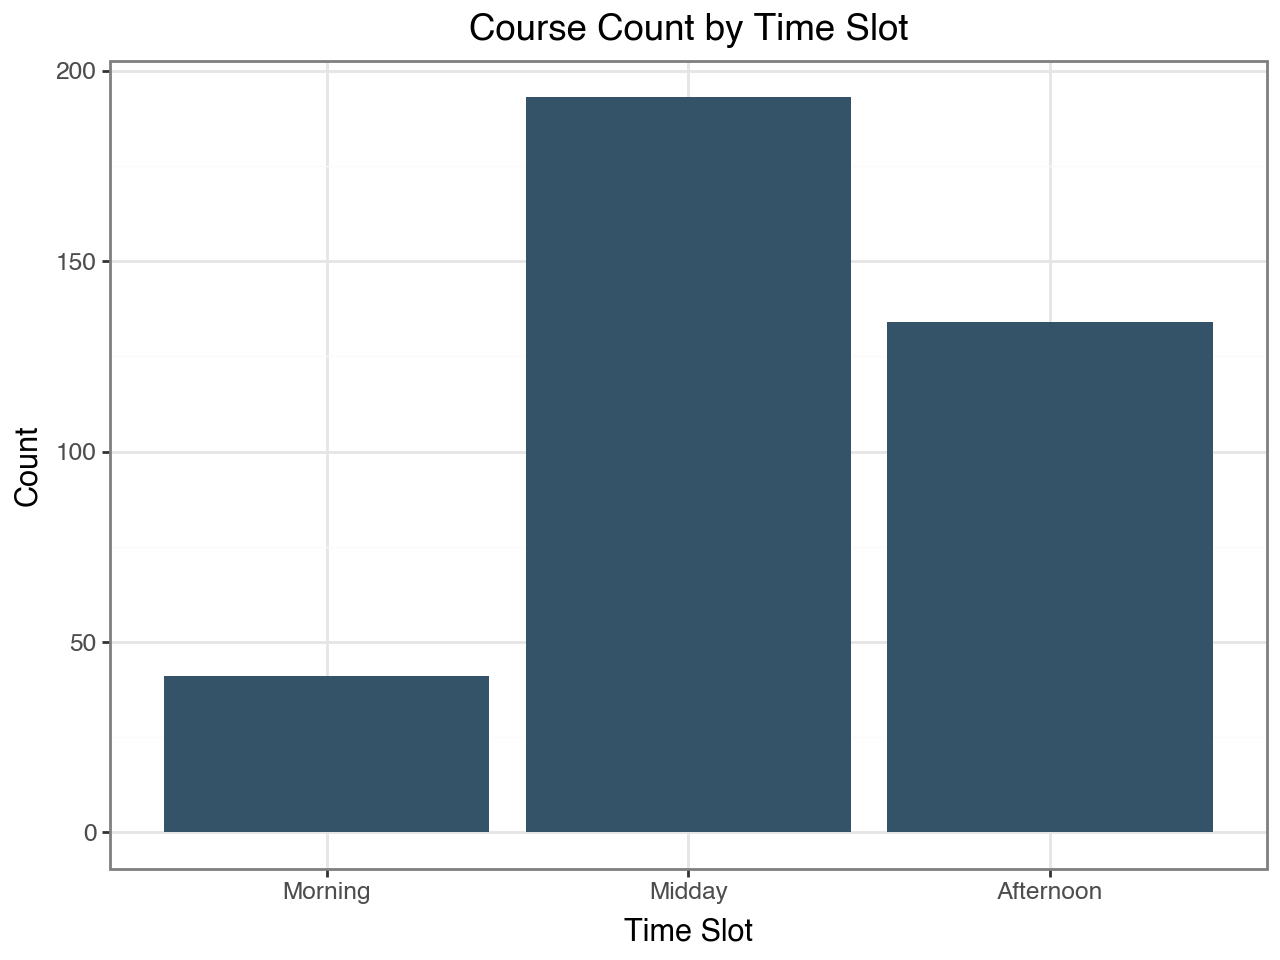

In [81]:
# Re-order x-axis labels
time_order = ["Morning", "Midday", "Afternoon"]  
time_slot_total_v2 = time_slot_total_v2[time_slot_total_v2["Time Slot"].isin(time_order)].copy()
time_slot_total_v2["Time Slot"] = pd.Categorical(time_slot_total_v2["Time Slot"], categories=time_order, ordered=True)

timeslots_count = (ggplot(time_slot_total_v2, aes(x="Time Slot", y="count")) +
                   geom_bar(stat="identity", fill="#345368") +
                   labs(title="Course Count by Time Slot", x="Time Slot", y="Count") +
                   theme_bw())

display(timeslots_count)

<h1> Days Scheduled Graphs</h1>

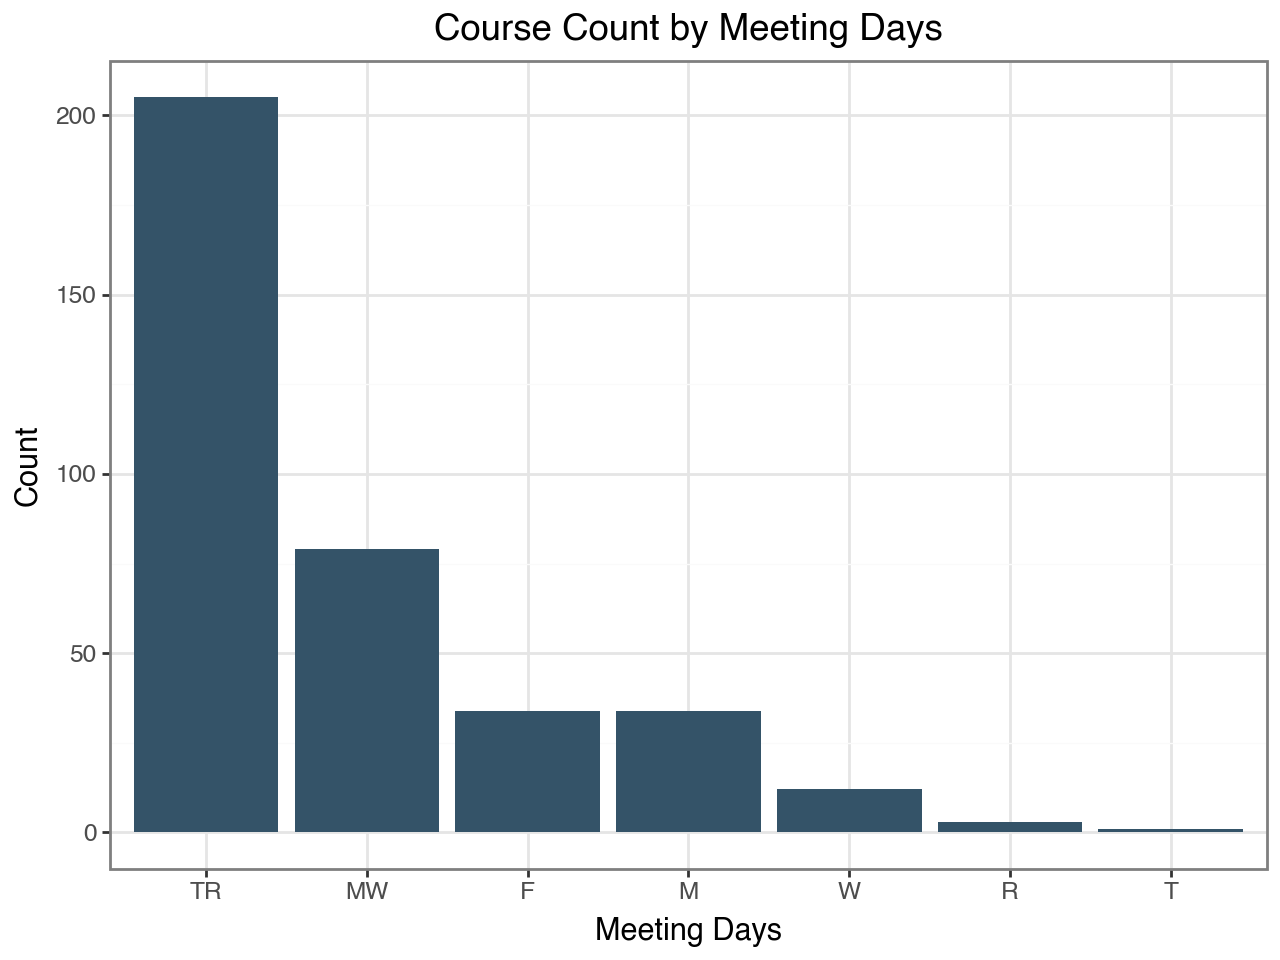

In [82]:
df_days_all = df_days_total[df_days_total["Modality"] == "df_all"].reset_index(drop=True)

# Re-order x-axis labels
days_tot_order = ["TR", "MW", "F", "M", "W", "R", "T"]  
df_days_all = df_days_all[df_days_all["Meeting Days"].isin(days_tot_order)].copy()
df_days_all["Meeting Days"] = pd.Categorical(df_days_all["Meeting Days"], categories=days_tot_order, ordered=True)

days_count = (ggplot(df_days_all, aes(x="Meeting Days", y="Count")) +
        geom_bar(stat="identity", fill="#345368") +
        labs(title="Course Count by Meeting Days", x="Meeting Days", y="Count") +
        theme_bw())

display(days_count)

Time of Day x Days of Week Heat Map

Data Prep

In [83]:
# x/y axis ordering
time_order = ["Morning", "Midday", "Afternoon"]
day_order2 = ["M", "MW", "T", "TR", "W", "R", "F"]

# Melt DF to Long for Graphing
timeday_df = pd.melt(time_slot_days2, id_vars=["Time Slot"], 
                    value_vars=day_order2, var_name="Day", value_name="Count")
# Keep desired Time Slot and Day values
timeday_df = timeday_df[timeday_df["Time Slot"].isin(time_order) & timeday_df["Day"].isin(day_order2)].copy()
# Apply ordering
timeday_df["Time Slot"] = pd.Categorical(timeday_df["Time Slot"], categories=time_order, ordered=True)
timeday_df["Day"] = pd.Categorical(timeday_df["Day"], categories=day_order2, ordered=True)


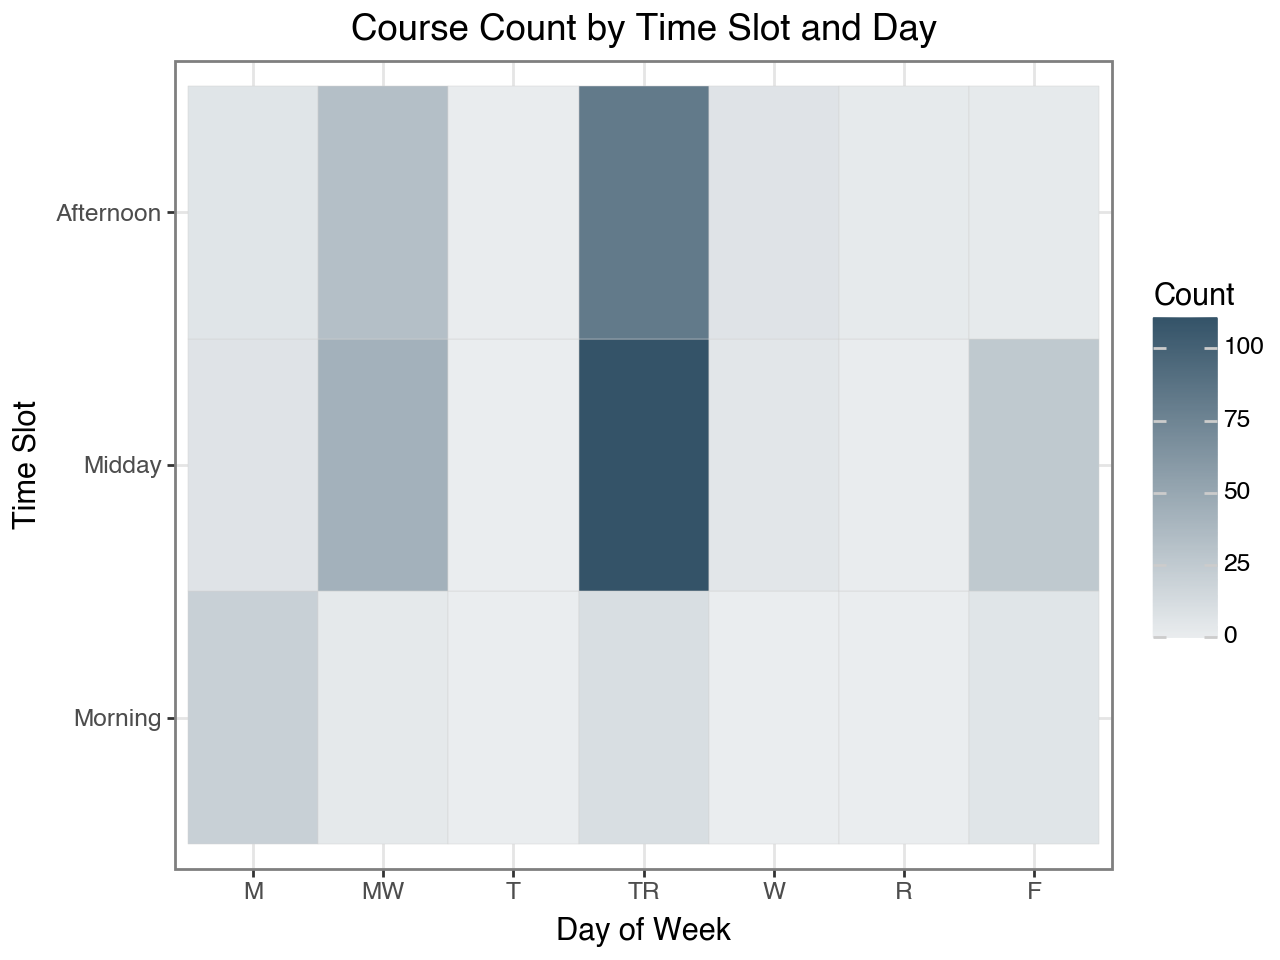

In [84]:
# Create the heatmap
timeday_graph = (ggplot(timeday_df, aes(x="Day", y="Time Slot", fill="Count")) +
                 geom_tile(color="lightgrey") +
                 scale_fill_gradient(low="#eaedef", high="#345368") +
                 labs(title="Course Count by Time Slot and Day", x="Day of Week", y="Time Slot") +
                 theme_bw())

display(timeday_graph)